In [1]:
import pandas as pd
import numpy as np
url ='https://raw.githubusercontent.com/khwanck/DeepLearning_NIDA01/main/winedata.csv'
data=pd.read_csv(url,)
data.head(5)

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines\t,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
x=data.drop('Y',1)
y=data.Y
print(x.head(5))
print(y.head(5))

   Alcohol  Malic acid   Ash  ...   Hue  OD280/OD315 of diluted wines  Proline
0    14.23        1.71  2.43  ...  1.04                          3.92     1065
1    13.20        1.78  2.14  ...  1.05                          3.40     1050
2    13.16        2.36  2.67  ...  1.03                          3.17     1185
3    14.37        1.95  2.50  ...  0.86                          3.45     1480
4    13.24        2.59  2.87  ...  1.04                          2.93      735

[5 rows x 13 columns]
0    1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)
type(x_train)
type(y_train)

pandas.core.series.Series

In [ ]:
#x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_train=x_train.astype(np.float32)
y_train=y_train.astype(np.float32)
input_dim=13
output_dim=4
type(y_train)

numpy.ndarray

In [ ]:
import sys
print(f"Python{sys.version}\n")
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

Python3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]



In [ ]:
model=tf.keras.models.Sequential()
#input layer
model.add(tf.keras.Input(shape=(input_dim)))

#hidden layer
model.add(tf.keras.layers.Dense(10,activation='relu',name='Hidden1'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN1'))
model.add(tf.keras.layers.Dense(10,activation='relu',name='Hidden2'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN2'))
model.add(tf.keras.layers.Dense(10,activation='relu',name='Hidden3'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN3'))
model.add(tf.keras.layers.Dropout(0.8))

#output layer
model.add(tf.keras.layers.Dense(output_dim,activation='softmax',name='output'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 10)                140       
                                                                 
 BN1 (BatchNormalization)    (None, 10)                40        
                                                                 
 Hidden2 (Dense)             (None, 10)                110       
                                                                 
 BN2 (BatchNormalization)    (None, 10)                40        
                                                                 
 Hidden3 (Dense)             (None, 10)                110       
                                                                 
 BN3 (BatchNormalization)    (None, 10)                40        
                                                                 
 dropout_5 (Dropout)         (None, 10)               

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [ ]:
#display(y_train)
#np.shape(y_train)

In [ ]:
#display(x_train)
#np.shape(x_train)

In [ ]:
checkpoint_filepath="bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_acc',mode='max',save_best_only=True)
history=model.fit(x_train,y_train,batch_size=100,epochs=20,verbose=1,validation_split=0.2,callbacks=[model_checkpoint_callback])

Epoch 1/20
2/2 [==============================] - 1s 246ms/step - loss: 2.1763 - acc: 0.3208 - val_loss: 1.1921 - val_acc: 0.6296
Epoch 2/20
2/2 [==============================] - 0s 25ms/step - loss: 2.7642 - acc: 0.3113 - val_loss: 1.1872 - val_acc: 0.6296
Epoch 3/20
2/2 [==============================] - 0s 29ms/step - loss: 2.2373 - acc: 0.3962 - val_loss: 1.1804 - val_acc: 0.6296
Epoch 4/20
2/2 [==============================] - 0s 25ms/step - loss: 2.6204 - acc: 0.3019 - val_loss: 1.1748 - val_acc: 0.5926
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 2.4322 - acc: 0.3208 - val_loss: 1.1709 - val_acc: 0.6667
Epoch 6/20
2/2 [==============================] - 0s 27ms/step - loss: 2.6303 - acc: 0.3774 - val_loss: 1.1654 - val_acc: 0.6667
Epoch 7/20
2/2 [==============================] - 0s 26ms/step - loss: 2.4514 - acc: 0.3491 - val_loss: 1.1614 - val_acc: 0.6667
Epoch 8/20
2/2 [==============================] - 0s 25ms/step - loss: 2.5592 - acc: 0.2830 - va

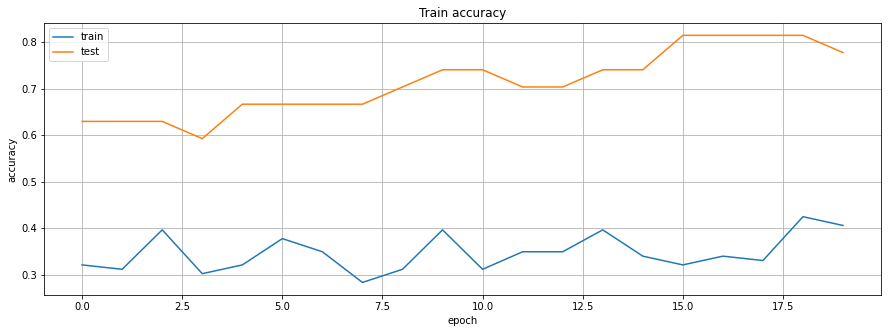

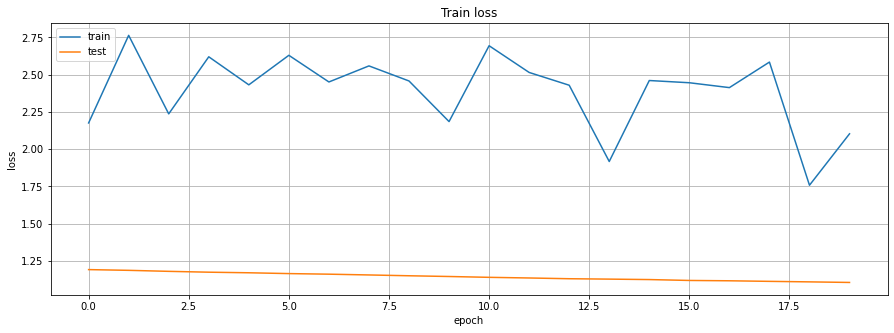

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print(f"{model.metrics_names} = {results}")

1/1 [==============================] - 0s 165ms/step - loss: 1.1137 - acc: 0.6444
['loss', 'acc'] = [1.113718867301941, 0.644444465637207]


In [ ]:
# Test using the model on x_test[i]
i = 0
y_pred = model.predict(x_test[i].reshape(1,-1)) # reshape x_test[i] from (n_feature,) to (1, n_feature)

print(f"{'#'*10} Input: x_test[{i}] {'#'*10}")
print(f"shape={x_test[i].shape}\nvalue={x_test[i]}\n")

print(f"{'#'*10} Ground truth: y_test[{i}] {'#'*10}")
#print(f"shape={y_test[i].shape}\nvalue={y_test[i]}\n")

print(f"{'#'*10} Prediction: y_pred {'#'*10}")
print(f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}")
print(f"value={y_pred}")
print(f"np.argmax(y_pred)={np.argmax(y_pred)}")

########## Input: x_test[0] ##########
shape=(13,)
value=[ 0.92484643 -0.64469361 -0.42620477 -0.88610265  1.21559263  0.5539025
  0.96128966 -1.20875804  0.01757924  0.30754192 -0.11757764  0.8498603
  1.02650167]

########## Ground truth: y_test[0] ##########
########## Prediction: y_pred ##########
type=<class 'numpy.ndarray'>
dtype=float32
shape=(1, 4)
value=[[0.11229211 0.6254936  0.10537428 0.15684   ]]
np.argmax(y_pred)=1
